# Tarea 1 Modelo de Brown (APT)
## Hairo Ulises Miranda Belmonte

In [1]:
##################
## Brown model
##################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##################
# Parámetros
##################
b = 1.0 
k = 4.0
sigma2_b = 0.01
sigma2_f = 0.000158
sigma2_e = 0.0045
n = 80
p = range(50,201)

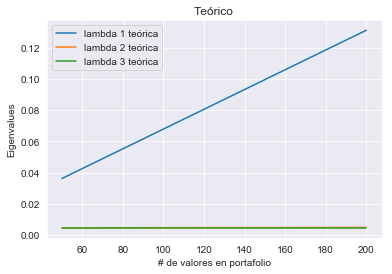

In [3]:
##################
# Modelo teórico
##################

sns.set_style("darkgrid")

k = 4.
lambda_1 = [sigma2_f*i*((1.*b**2)*1.*k+sigma2_b)+sigma2_e for i in p]
lambda_2 = [sigma2_f*i*sigma2_b+sigma2_e for i in p]
lambda_3 = [sigma2_e for i in p]


plt.plot(list(p), lambda_1, label='lambda 1 teórica')
plt.plot(list(p), lambda_2, label='lambda 2 teórica')
plt.plot(list(p), lambda_3, label='lambda 3 teórica')
plt.title("Teórico")
plt.xlabel("# de valores en portafolio")
plt.ylabel("Eigenvalues")
plt.legend()

Text(0, 0.5, 'Eigenvalues')

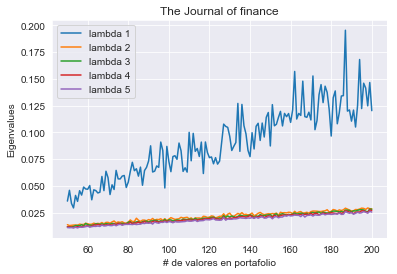

In [4]:
####################
# Modelo Empírico 1
####################

Matriz_1 = np.zeros((151,5), dtype=float)

for i in p:        
    F = np.random.normal(0, np.sqrt(sigma2_f), (n, 4))
    L = np.random.normal(b,  np.sqrt(sigma2_b), (i, 4))
    epsilon =  np.random.normal(0,  np.sqrt(sigma2_e), (i, n))
    R = np.dot(L,F.T) + epsilon
    Sigma = np.dot(R,R.T) / (1.*n)
    v, w = np.linalg.eigh(Sigma)
    temp = np.sort(v)
    temp_2 = temp[::-1]
    Matriz_1[i-50,:] = temp_2[0:5]


 #%%  
plt.plot(np.asarray(list(p)), Matriz_1[:,0], label='lambda 1')
plt.plot(np.asarray(list(p)), Matriz_1[:,1], label='lambda 2')
plt.plot(np.asarray(list(p)), Matriz_1[:,2], label='lambda 3')
plt.plot(np.asarray(list(p)), Matriz_1[:,3], label='lambda 4')
plt.plot(np.asarray(list(p)), Matriz_1[:,4], label='lambda 5')
plt.legend()
plt.title("The Journal of finance")
plt.xlabel("# de valores en portafolio")
plt.ylabel("Eigenvalues")

In [5]:
####################
# Modelo Empírico 2
####################
Matriz = np.zeros((151,5), dtype=float)
LOWER = np.zeros((151,5), dtype=float)
UPPER = np.zeros((151,5), dtype=float)

for i in p:      
    R_ = np.zeros((100, 5))
    for j in range(100):
        F = np.random.normal(0, np.sqrt(sigma2_f), (n, 4))
        L = np.random.normal(b,  np.sqrt(sigma2_b), (i, 4))
        epsilon =  np.random.normal(0,  np.sqrt(sigma2_e), (i, n))
        R = np.dot(L,F.T) + epsilon
        Sigma = np.dot(R,R.T) / (1.*n)
        v, w = np.linalg.eigh(Sigma)
        temp = np.sort(v)
        temp_2 = temp[::-1]
        R_[j,:] =  temp_2[0:5]
        Low =  np.quantile(R_[:,0], .25)
        Upp =  np.quantile(R_[:,0], .75)
    vp = R_.mean(axis=0)
    Matriz[i-50,:] = vp
    LOWER[i-50,:] = Low
    UPPER[i-50,:] = Upp

Text(0, 0.5, 'Eigenvalues')

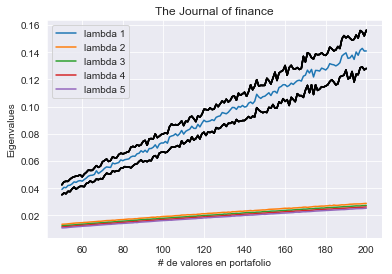

In [6]:
plt.plot(np.asarray(list(p)), Matriz[:,0], label='lambda 1')
plt.plot(np.asarray(list(p)), Matriz[:,1], label='lambda 2')
plt.plot(np.asarray(list(p)), Matriz[:,2], label='lambda 3')
plt.plot(np.asarray(list(p)), Matriz[:,3], label='lambda 4')
plt.plot(np.asarray(list(p)), Matriz[:,4], label='lambda 5')
plt.plot(np.asarray(list(p)), LOWER, c ="black")
plt.plot(np.asarray(list(p)), UPPER, c ="black")
plt.legend()
plt.title("The Journal of finance")
plt.xlabel("# de valores en portafolio")
plt.ylabel("Eigenvalues")


Text(0, 0.5, 'Eigenvalues')

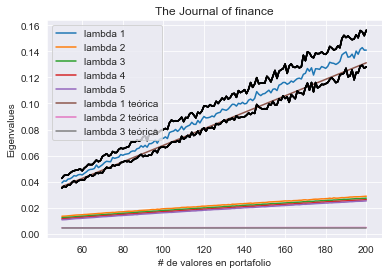

In [7]:
##############################
# Modelo Empírico vs Teórico
##############################

plt.plot(np.asarray(list(p)), Matriz[:,0], label='lambda 1')
plt.plot(np.asarray(list(p)), Matriz[:,1], label='lambda 2')
plt.plot(np.asarray(list(p)), Matriz[:,2], label='lambda 3')
plt.plot(np.asarray(list(p)), Matriz[:,3], label='lambda 4')
plt.plot(np.asarray(list(p)), Matriz[:,4], label='lambda 5')
plt.plot(list(p), lambda_1, label='lambda 1 teórica')
plt.plot(list(p), lambda_2, label='lambda 2 teórica')
plt.plot(list(p), lambda_3, label='lambda 3 teórica')
plt.plot(np.asarray(list(p)), LOWER, c ="black")
plt.plot(np.asarray(list(p)), UPPER, c ="black")
plt.legend()
plt.title("The Journal of finance")
plt.xlabel("# de valores en portafolio")
plt.ylabel("Eigenvalues")